# Analysing Titanic passenger information

## Intro do Data Analysis - Lesson4

### interesting links
    - about the data:
        http://blog.kaggle.com/2016/06/29/communicating-data-science-a-guide-to-presenting-your-work/
        
    - about the titanic:
        https://www.encyclopedia-titanica.org/titanic-passenger-list/
        https://en.wikipedia.org/wiki/RMS_Titanic
    
    - about report of data analysis:
        https://career-resource-center.udacity.com/portfolio/data-science-reports
        http://blog.kaggle.com/2016/06/29/communicating-data-science-a-guide-to-presenting-your-work/
    
    - about the df.plot():
        http://queirozf.com/entries/pandas-dataframe-plot-examples-with-matplotlib-pyplot
        
      
        

### comments-ideas:
    number of passengers in the csv file 891 but in titanic 1350 (vary depending of the sources)
    
    

### Problematique : Question about the data
    1 What is the passenger surviving rate ? (new technology safe ?)
    2 Statistics about passenger age? (distribution)
    3 Are women more likly to survive than men ? (titanic the movie)
    4 Are rich more likly to survive ? (first class to rest and second class to third)
    5 What are the most impact variables on the survivinge rate of the titanic passengers? 
    6 Anything else ?
    

#### import requiered packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

#### Open csv file and check some values

In [4]:
file_name='titanic_data.csv'
full_path=file_name
titanic_df=pd.read_csv(full_path)
num_row,num_col=titanic_df.shape
print('there is {} rows and {} cols in this df'.format(num_row,num_col))
titanic_df.head()


there is 891 rows and 12 cols in this df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### split names
    Name -> Name, FName and MrsName

In [5]:
name_df=titanic_df.Name.str.replace('(',',').str.replace(')','').str.split(',',expand=True)
titanic_df['Name']=name_df[0]
titanic_df['Fname']=name_df[1]
titanic_df['Mname']=name_df[2]


In [6]:
titanic_df[titanic_df['Name']=='Futrelle']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fname,Mname
3,4,1,1,Futrelle,female,35.0,1,0,113803,53.1,C123,S,Mrs. Jacques Heath,Lily May Peel
137,138,0,1,Futrelle,male,37.0,1,0,113803,53.1,C123,S,Mr. Jacques Heath,None


In [7]:
titanic_df[titanic_df['Name']=='Palsson']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fname,Mname
7,8,0,3,Palsson,male,2.0,3,1,349909,21.075,NaN,S,Master. Gosta Leonard,None
24,25,0,3,Palsson,female,8.0,3,1,349909,21.075,NaN,S,Miss. Torborg Danira,None
374,375,0,3,Palsson,female,3.0,3,1,349909,21.075,NaN,S,Miss. Stina Viola,None
567,568,0,3,Palsson,female,29.0,0,4,349909,21.075,NaN,S,Mrs. Nils,Alma Cornelia Berglund


#### 1: Surviving rate on the RMS Titanic

In [8]:
#add a dead column
#titanic_df['Dead']=(1+titanic_df.Survived)%2

#calculate the Surviving_rate and the deat rate
survivors_count=titanic_df[titanic_df.Survived==1]['PassengerId'].count()
dead_count=titanic_df[titanic_df.Survived==0]['PassengerId'].count()
passengers_count=titanic_df['PassengerId'].count()
Surviving_rate=round(survivors_count*100/passengers_count,1)
death_rate=round(dead_count*100/passengers_count,1)

#display result
print("The surving rate on the RMS Titanic is about {}% -> {} survivors / {} passengers".format(Surviving_rate,survivors_count,passengers_count))
print("The death rate on the RMS Titanic is about {}%-> {} survivors / {} passengers".format(death_rate,dead_count,passengers_count))


The surving rate on the RMS Titanic is about 38.4% -> 342 survivors / 891 passengers
The death rate on the RMS Titanic is about 61.6%-> 549 survivors / 891 passengers


#### 2: Age distribution on the Titanic

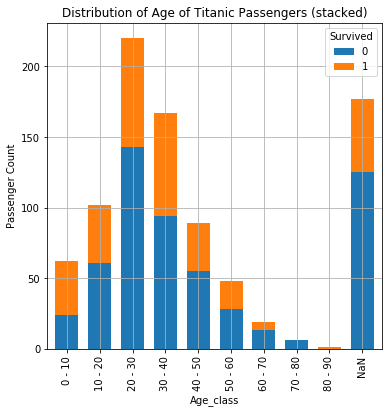

In [9]:
# titanic_df.Age.max()
# fill nan value with 99 (no trouble since max age =80) 
titanic_df.Age.fillna(99,inplace=True)

# class age in groups of 10 years
titanic_df['Age_class']=((titanic_df.Age*0.1).apply(int)*10).apply(str)+' - '+(((titanic_df.Age*0.1).apply(int)+1)*10).apply(str)

titanic_df_age_group=(titanic_df.groupby(['Survived','Age_class'],group_keys=False,as_index=False).size().unstack()).fillna(0).T
titanic_df_age_group.rename(index={'90 - 100': 'NaN'},inplace=True)
#titanic_df_age_group.loc['total'] = [len(titanic_df[titanic_df.Survived==0]),len(titanic_df[titanic_df.Survived==1])]
titanic_df_age_group.plot(kind='bar',stacked=True
                          ,grid=True,title='Distribution of Age of Titanic Passengers (stacked)',figsize=(6,6),width=0.7)
plt.ylabel('Passenger Count')
plt.show()

#simple solution
#titanic_df[['Age']].plot(kind='hist',bins=[0,10,20,30,40,50,60,70,80,90],rwidth=0.8)


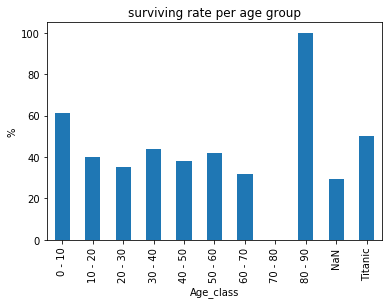

In [8]:
titanic_df_age_group.loc['Titanic']=Surviving_rate
titanic_df_age_group['Surviving_rate']=round(titanic_df_age_group[1]*100/(titanic_df_age_group[0]+titanic_df_age_group[1]),1)
titanic_df_age_group['Surviving_rate'].plot(kind='bar', title='surviving rate per age group')
plt.ylabel('%')
plt.show()

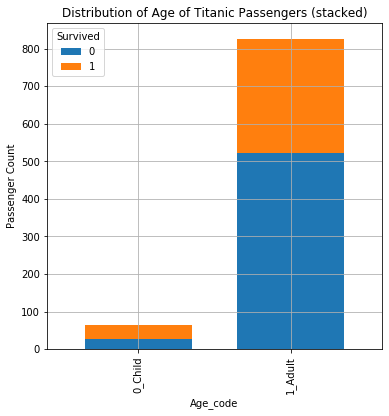

In [9]:
def age_to_int(Age):
    if Age<=10:
        return '0_Child'
    else:
        return '1_Adult'
    
titanic_df['Age_code']=titanic_df.Age.apply(age_to_int)
titanic_df_age_group=(titanic_df.groupby(['Survived','Age_code'],group_keys=False,as_index=False).size().unstack()).fillna(0).T
titanic_df_age_group.plot(kind='bar',stacked=True
                          ,grid=True,title='Distribution of Age of Titanic Passengers (stacked)',figsize=(6,6),width=0.7)
plt.ylabel('Passenger Count')
plt.show()

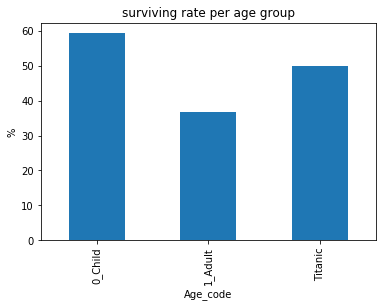

In [10]:
titanic_df_age_group.loc['Titanic']=Surviving_rate
titanic_df_age_group['Surviving_rate']=round(titanic_df_age_group[1]*100/(titanic_df_age_group[0]+titanic_df_age_group[1]),1)
titanic_df_age_group['Surviving_rate'].plot(kind='bar', title='surviving rate per age group')
plt.ylabel('%')
plt.show()

#### 3: distribution of gender of the Titanic passenger

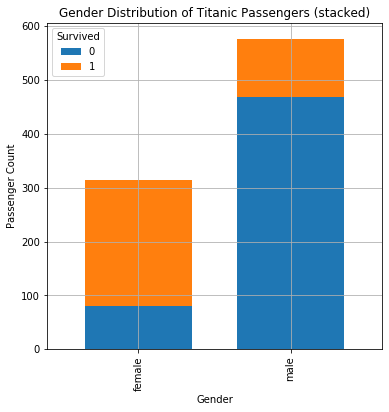

In [11]:
titanic_df_gender=(titanic_df.groupby(['Survived','Sex'],group_keys=False,as_index=False).size().unstack()).T
titanic_df_gender.plot(kind='bar',grid=True,stacked=True,width=0.7,figsize=(6,6)
                       ,title='Gender Distribution of Titanic Passengers (stacked)')
plt.ylabel('Passenger Count')
plt.xlabel('Gender')
plt.show()

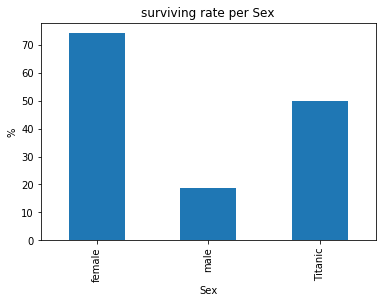

In [12]:
titanic_df_gender.loc['Titanic']=Surviving_rate
titanic_df_gender['Surviving_rate']=round(titanic_df_gender[1]*100/(titanic_df_gender[0]+titanic_df_gender[1]),1)
titanic_df_gender['Surviving_rate'].plot(kind='bar', title='surviving rate per Sex')
plt.ylabel('%')
plt.show()

#### 4: PClass distribution of the Titanic passenger

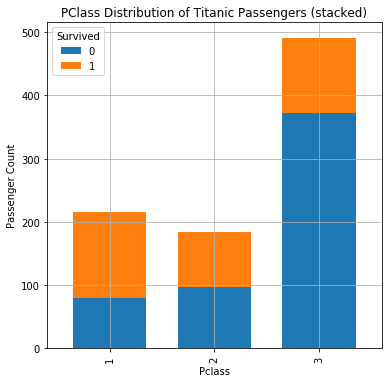

In [13]:
titanic_df_Pclass=(titanic_df.groupby(['Survived','Pclass'],group_keys=False,as_index=False).size().unstack()).T
titanic_df_Pclass.plot(kind='bar',stacked=True
                        ,grid=True,title='PClass Distribution of Titanic Passengers (stacked)',figsize=(6,6),width=0.7)
plt.ylabel('Passenger Count')
plt.show()

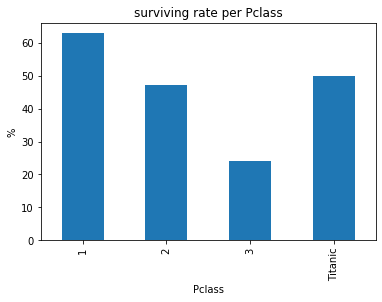

In [14]:
titanic_df_Pclass.loc['Titanic']=Surviving_rate
titanic_df_Pclass['Surviving_rate']=round(titanic_df_Pclass[1]*100/(titanic_df_Pclass[0]+titanic_df_Pclass[1]),1)
titanic_df_Pclass['Surviving_rate'].plot(kind='bar', title='surviving rate per Pclass')
plt.ylabel('%')
plt.show()

#### 5: PClass, Gender, Age distribution of the Titanic passenger

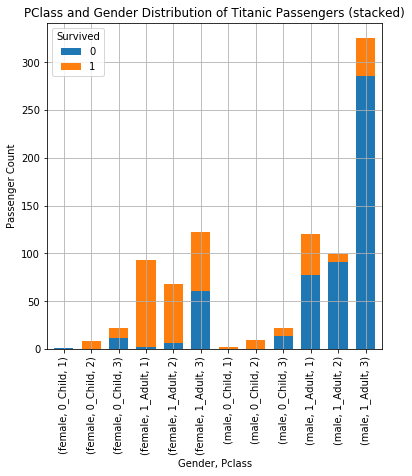

In [15]:
titanic_df_Surv_Sex_Pclass=(titanic_df.groupby(['Sex','Age_code','Pclass','Survived'],as_index=False).size().unstack().fillna(0))

#titanic_df_Surv_Sex_Pclass.loc['total'] = list(titanic_df_Surv_Sex_Pclass.sum().values)
titanic_df_Surv_Sex_Pclass.plot(kind='bar',stacked=True
                        ,grid=True,title='PClass and Gender Distribution of Titanic Passengers (stacked)',figsize=(6,6),width=0.7)
plt.ylabel('Passenger Count')
plt.xlabel('Gender, Pclass')
plt.show()
#titanic_df_Surv_Sex_Pclass

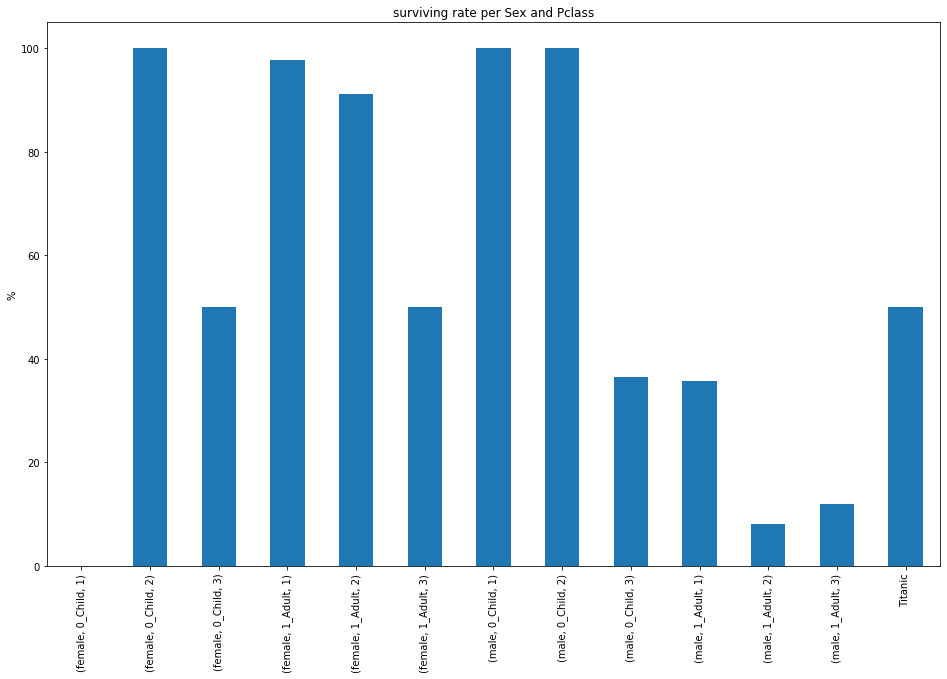

In [16]:
titanic_df_Surv_Sex_Pclass.loc['Titanic']=Surviving_rate
titanic_df_Surv_Sex_Pclass['Surviving_rate']=round(titanic_df_Surv_Sex_Pclass[1]*100/(titanic_df_Surv_Sex_Pclass[0]+titanic_df_Surv_Sex_Pclass[1]),1)
titanic_df_Surv_Sex_Pclass['Surviving_rate'].plot(kind='bar', title='surviving rate per Sex and Pclass',figsize=(16,10))
plt.ylabel('%')
plt.show()

#### 6 Something else interestiong 
    determine Pearson Correlation for a variable

In [17]:
def Strong_pearson_correlation(df=titanic_df,min_r=0.5):
    ''' returns all correlation with pearson r higher than a given value
    inputs:
        - df (Dataframe):  Dataframe that is investigated
         - min_r (float) : min r pearson for coorelation to be relevant
    returns:
        - returns all correlation with pearson r > min_r 
    default input
        - df=titanic_df
        - min_r=0.6
    examples:
        - find_pearson_correlation() #for default value
        - find_pearson_correlation('EXITSn',0.7)
        - find_pearson_correlation('EXITSn',0.5)
    '''
# determine the r_pearson coorelation matrix
    corr_pearson=df.corr(method='pearson')
    # get correlation at min_r
    my_strong_corr={} 
    for col in corr_pearson.columns:
        for row in corr_pearson.index:
            if row==col:
                break
            else:
                if abs(corr_pearson.loc[row, col])>=min_r and abs(corr_pearson.loc[row, col])<1:
                    corr=(row,col)
                    my_strong_corr[corr]=round(corr_pearson.loc[row, col],6)
    return my_strong_corr

def find_pearson_correlation(df=titanic_df, var='Survived',min_r=0.5):
    ''' returns a list of correlation for a given var
    inputs:
        - df (Dataframe):  Dataframe that is investigated
        - Var (string) : variable that is investigated
        - min_r (float) : min r pearson for coorelation to be relevant
    returns:
        - list of correlation and associated r pearson
    default input
        - df = titanic_df
        - var = 'Survived'
        - min_r = 0.5
    examples:
        - find_pearson_correlation() #for default value
        - find_pearson_correlation('Survived',0.5)
    ''' 
    if type(var)!=str:
        print('the variable must be between " " or ' ' and be a string')
    else:
        my_strong_corr=Strong_pearson_correlation(df=df,min_r=min_r)
                        
         # get the correlation involving the given var               
        my_corr=[]
        for i in range(len(list(my_strong_corr.keys()))):
            if var in list(my_strong_corr.keys())[i]:
                my_corr.append(list(my_strong_corr.keys())[i])
                
        my_related_corr={}
        for corr in my_corr:
            my_related_corr[corr]=my_strong_corr[corr]
        return my_related_corr


In [18]:
def gender_to_int(Sex):
    if Sex=='female':
        return 1
    elif Sex=='male':
        return 0

def port_to_int(port):
    if port=='C':
        return 0
    elif port=='Q':
        return 1
    elif port=='S':
        return 2 
    
titanic_df['gender_code']=titanic_df.Sex.apply(gender_to_int)
titanic_df['port_code']=titanic_df.Embarked.apply(port_to_int)
#titanic_df.head()

In [19]:
print(Strong_pearson_correlation(df=titanic_df,min_r=0.5))
print(find_pearson_correlation(df=titanic_df, var='Survived',min_r=0.5))
print(find_pearson_correlation(df=titanic_df, var='Pclass',min_r=0.5))


{('Pclass', 'Fare'): -0.5495, ('Survived', 'gender_code'): 0.543351}
{('Survived', 'gender_code'): 0.543351}
{('Pclass', 'Fare'): -0.5495}


####  Fare vs Embarked Port and Pclass

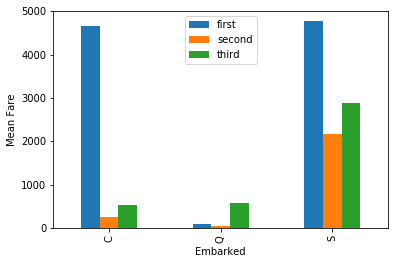

In [20]:
Pclass_vs_fare=titanic_df.groupby(['Ticket','Fare','Pclass','Embarked'],as_index=False)[['Fare','Pclass','Embarked']].all()
#Pclass_vs_fare2=Pclass_vs_fare.groupby(['Pclass','Embarked'],as_index=False)['Fare'].mean()
Pclass_vs_fare2=Pclass_vs_fare.groupby(['Pclass','Embarked'],as_index=False)['Fare'].sum()
first=Pclass_vs_fare2[Pclass_vs_fare2.Pclass==1].set_index('Embarked')
second=Pclass_vs_fare2[Pclass_vs_fare2.Pclass==2].set_index('Embarked')
third=Pclass_vs_fare2[Pclass_vs_fare2.Pclass==3].set_index('Embarked')
ind=third.index
tiket_price_df=pd.concat([first['Fare'], second['Fare'],third['Fare']], axis=1, keys=['first', 'second','third'])
tiket_price_df.plot(kind='bar')
plt.ylabel('Mean Fare')
plt.show()

In [21]:
titanic_df_by_tiket=titanic_df.groupby(['Ticket','Fare','Pclass','Embarked'],as_index=False)[['Fare','Pclass','Embarked']].size().reset_index(name='Pcount')
tiket_stat_df=titanic_df_by_tiket.groupby(['Embarked','Pclass'],as_index=False)['Fare'].agg({'stat': 'describe'})
tiket_stat_df

Embarked Pclass   stat                                                    \
                   count       mean        std      min       25%      50%   
0        C      1   57.0  81.616154  79.924655  26.5500  31.00000  61.3792   
1        C      2   12.0  21.404858  10.383105  12.0000  13.84165  15.0479   
2        C      3   53.0   9.922885   4.348954   4.0125   7.22500   7.2292   
3        Q      1    1.0  90.000000        NaN  90.0000  90.00000  90.0000   
4        Q      2    3.0  12.350000   0.000000  12.3500  12.35000  12.3500   
5        Q      3   62.0   9.204102   4.322231   6.7500   7.75000   7.7500   
6        S      1   90.0  53.033194  47.310064   0.0000  26.55000  35.2500   
7        S      2  125.0  17.259600  10.159603   0.0000  12.27500  13.0000   
8        S      3  280.0  10.296856   6.969020   0.0000   7.79580   7.9250   

                       
        75%       max  
0  83.15830  512.3292  
1  28.30830   41.5792  
2  14.45420   22.3583  
3  90.00000   90.0000  
4  12.35000   12.3500  
5   7.82920   29.1250  
6  55.67500  263.0000  
7  26.00000   73.5000  
8   9.25625   69.5500


Fare volatility



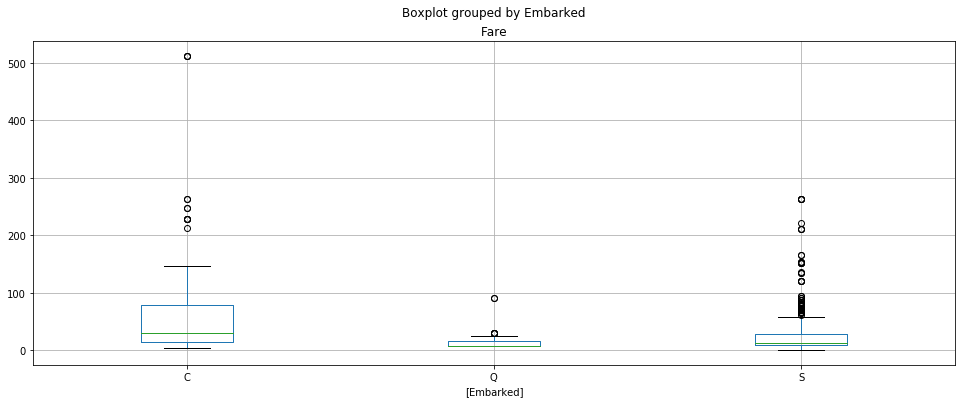

In [22]:
print('\nFare volatility\n')
#titanic_df.boxplot(column='Fare',by=['Pclass','Embarked'],figsize=(16,6))
titanic_df.boxplot(column='Fare',by=['Embarked'],figsize=(16,6))

plt.show()


In [23]:
titanic_df.groupby(['Pclass','Survived'],as_index=False)['Fare'].agg({'stat':'describe'})


Pclass Survived   stat                                                    \
                   count       mean        std      min       25%      50%   
0      1        0   80.0  64.684008  60.662089   0.0000  27.74270  44.7500   
1      1        1  136.0  95.608029  85.286820  25.9292  50.98545  77.9583   
2      2        0   97.0  19.412328  15.307175   0.0000  11.50000  13.0000   
3      2        1   87.0  22.055700  10.853502  10.5000  13.00000  21.0000   
4      3        0  372.0  13.669364  12.118338   0.0000   7.75000   8.0500   
5      3        1  119.0  13.694887  10.692993   0.0000   7.77500   8.5167   

                         
          75%       max  
0   78.937500  263.0000  
1  111.481225  512.3292  
2   26.000000   73.5000  
3   26.250000   65.0000  
4   15.136450   69.5500  
5   15.875000   56.4958

### Conclusion
     preliminary comment: 
         this study deals with a bit more than the half of the Titanic passenger list. (891 vs 1352)
         the titanic crew is not involved in the study. allthough it might affect the reflection about survivors 
         
         
     for the given data, the folowing conclusion can be drawn about the survivors:
         - Women are more likly to survive 
         - Children are more likly to survive
         - Rich are more likly to survive
         
     more details:
         - Women and girls(<18 years old) of the 1st and 2nd Class have a surviving rate of about 90%  
         - Boys(<18 years old) of the 1st and 2nd Class have a surviving rate of about 80% and 60% respectively
         - Men (>18) of 1st, 2nd and 3rd Class have the lowest survivinge rate of about 35%, 10% and 15% respectively
         - interesting fact is that the surviving rate of a 1st class male adult(35%) is higher than 3rd class boy(20%)
         - Interesting fact about 1st class: survivors have a significanctly higher fare average than the deads
         in the end the most inpacting variable for on the surviving is gender, age(as defined in the study) and class in this order 
      
      other facts:
          - the way the embarcation port atribute fare to a tiket seems chaotic without further details
          - fare volatility(std) vs port attendence could be correlated (too less port to conclude)
         
        

In [4]:
print(1+2)
print('hello')

3
hello
